In [1]:
root_name = 'Sina_Finance_Comments_85C_20180823'
print(root_name)

Sina_Finance_Comments_85C_20180823


In [2]:
import pandas as pd
df = pd.read_csv(root_name+'_ALL.csv',encoding='utf-8')
print(df.shape)
df.drop_duplicates(subset=['nick', 'content'], keep='last',inplace=True)
print(df.shape)
df.head()

(167, 17)
(167, 17)


,Unnamed: 0,No,page,nick,time,content,area,ip,length,against,agree,channel,hot,level,login_type,media_type,mid
0,0,1,1,这辈子不会放过西西,2018-08-22 00:25:56,打从心底瞧不起 这比抵制还不如！沒文化唄,福建厦门,110.87.109.240,29,1534868756,0,cj,0,3,0,0,5B7C3D11-6E576DF0-16B2193F6-901-92E
1,1,2,1,双面H,2018-08-21 17:01:42,回复 @半月kodachi:hhhhhhhh,湖北武汉,59.71.151.149,22,1534842102,0,cj,0,8,0,0,5B7BD4F4-3B479795-48A9D835-901-868
2,2,3,1,塞上陶然哥,2018-08-21 15:28:47,抵制了吗？用脑还是用脚想的？,宁夏银川,1.50.100.54,27,1534836527,0,cj,0,2,0,0,5B7BBF2E-1326436-1384F245E-901-834
3,3,4,1,半月kodachi,2018-08-21 14:20:25,幼稚。,广东广州,117.136.41.50,10,1534832425,0,cj,0,7,0,0,5B7BAF26-75882932-9E76B555-901-904
4,4,5,1,这辈子不会放过西西,2018-08-21 13:00:27,反正全世界抵制中国产品 你骄傲啥？,台湾台中,59.120.86.168,26,1534827627,0,cj,0,1,0,0,5B7B9C6B-3B7856A8-16B2193F6-901-92E


In [3]:
from datetime import datetime
def time2stamp(cmnttime):
    cmnttime = datetime.strptime(cmnttime, '%Y-%m-%d %H:%M:%S') 
    stamp = int(datetime.timestamp(cmnttime))
    return stamp
df['stamp'] = df['time'].apply(time2stamp)
df['time_ymd'] = df.time.apply(lambda x:x.split(' ')[0]) # 年月日
df['time_mdh'] = df.time.apply(lambda x:x.split(':')[0][5:]) #月日时 # 方便后续可视化时横坐标展示
df.head()

,Unnamed: 0,No,page,nick,time,content,area,ip,length,against,agree,channel,hot,level,login_type,media_type,mid,stamp,time_ymd,time_mdh
0,0,1,1,这辈子不会放过西西,2018-08-22 00:25:56,打从心底瞧不起 这比抵制还不如！沒文化唄,福建厦门,110.87.109.240,29,1534868756,0,cj,0,3,0,0,5B7C3D11-6E576DF0-16B2193F6-901-92E,1534868756,2018-08-22,08-22 00
1,1,2,1,双面H,2018-08-21 17:01:42,回复 @半月kodachi:hhhhhhhh,湖北武汉,59.71.151.149,22,1534842102,0,cj,0,8,0,0,5B7BD4F4-3B479795-48A9D835-901-868,1534842102,2018-08-21,08-21 17
2,2,3,1,塞上陶然哥,2018-08-21 15:28:47,抵制了吗？用脑还是用脚想的？,宁夏银川,1.50.100.54,27,1534836527,0,cj,0,2,0,0,5B7BBF2E-1326436-1384F245E-901-834,1534836527,2018-08-21,08-21 15
3,3,4,1,半月kodachi,2018-08-21 14:20:25,幼稚。,广东广州,117.136.41.50,10,1534832425,0,cj,0,7,0,0,5B7BAF26-75882932-9E76B555-901-904,1534832425,2018-08-21,08-21 14
4,4,5,1,这辈子不会放过西西,2018-08-21 13:00:27,反正全世界抵制中国产品 你骄傲啥？,台湾台中,59.120.86.168,26,1534827627,0,cj,0,1,0,0,5B7B9C6B-3B7856A8-16B2193F6-901-92E,1534827627,2018-08-21,08-21 13


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
df['cmntcount'] =int(df.shape[0])-df['No']
df['cmntcount'].head()

0    166
1    165
2    164
3    163
4    162
Name: cmntcount, dtype: int64

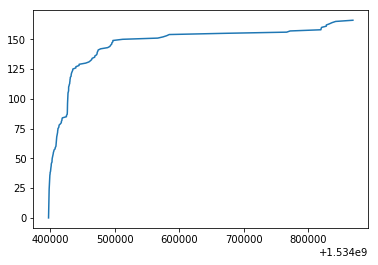

In [5]:
plt.plot(df.stamp, df.cmntcount);

In [6]:
from pyecharts import Bar, Line, Overlap


df_mdhmax = df.groupby('time_mdh')['cmntcount'].max()
df_mdhcount = df.groupby('time_mdh')['cmntcount'].count()
from pyecharts import Bar, Line, Overlap
bar = Bar("每小时评论数")
bar.add("小时", df_mdhcount.index, df_mdhcount.values,is_label_show=True,xaxis_interval=-90,
        xaxis_rotate=-90, yaxis_interval=200,yaxis_max=800)
line = Line("每小时评论数")
line.add("小时", df_mdhmax.index, df_mdhmax.values,line_opacity=1,
         line_type='dotted', yaxis_interval=1000,yaxis_max=4000)

overlap = Overlap()
overlap.add(bar)
overlap.add(line, is_add_yaxis=True, yaxis_index=1)
#overlap.render() # 使用 render() 渲染生成 .html 文件
overlap

In [7]:
df[df.time_mdh.str.contains('08-09 14')]

,Unnamed: 0,No,page,nick,time,content,area,ip,length,against,...,channel,hot,level,login_type,media_type,mid,stamp,time_ymd,time_mdh,cmntcount


In [8]:



df.to_csv(root_name+'_Cleaned.csv', encoding='utf-8', line_terminator='\r\n')